In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [2]:
data = pd.read_csv("cm1.csv")
data.dropna(inplace=True)
data.shape

(498, 22)

In [3]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  
 16  uniq_Op            498 non

In [30]:
print(data.groupby('defects').size())

defects
False    449
True      49
dtype: int64


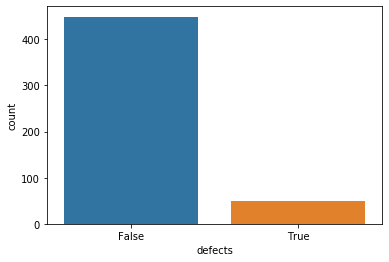

In [31]:
sns.countplot(data['defects'],label="Count")
plt.show()

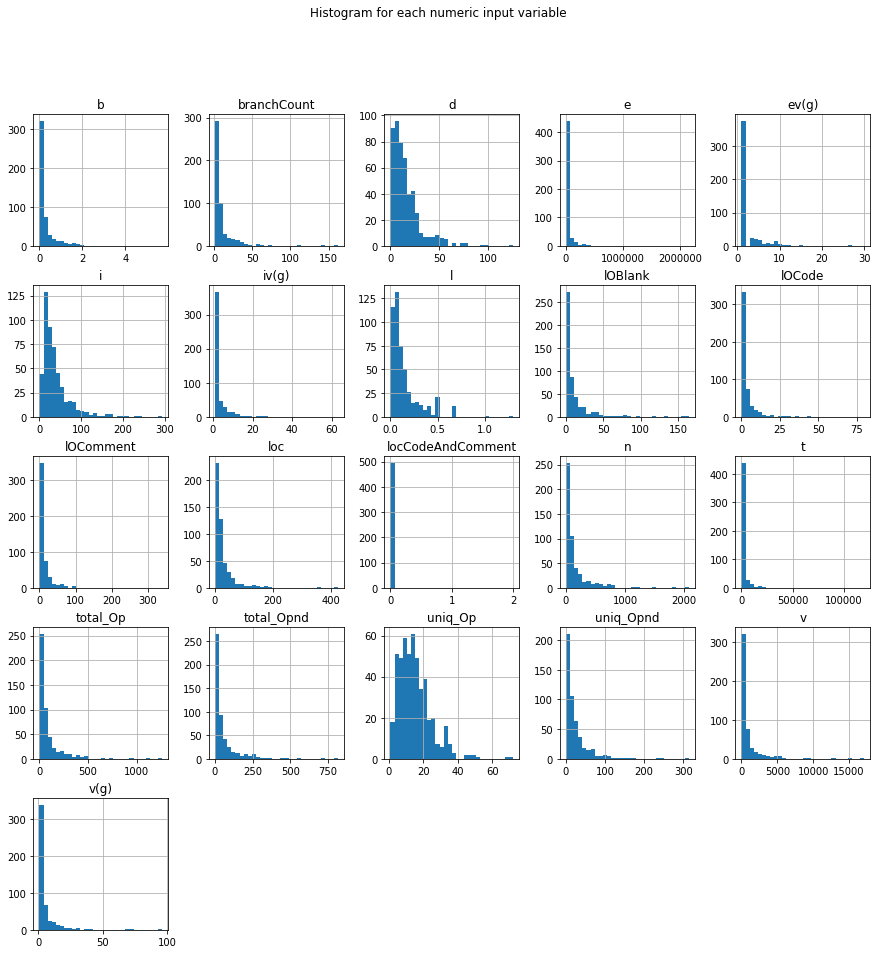

In [35]:
import pylab as pl
data.drop('defects' ,axis=1).hist(bins=30, figsize=(15,15))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

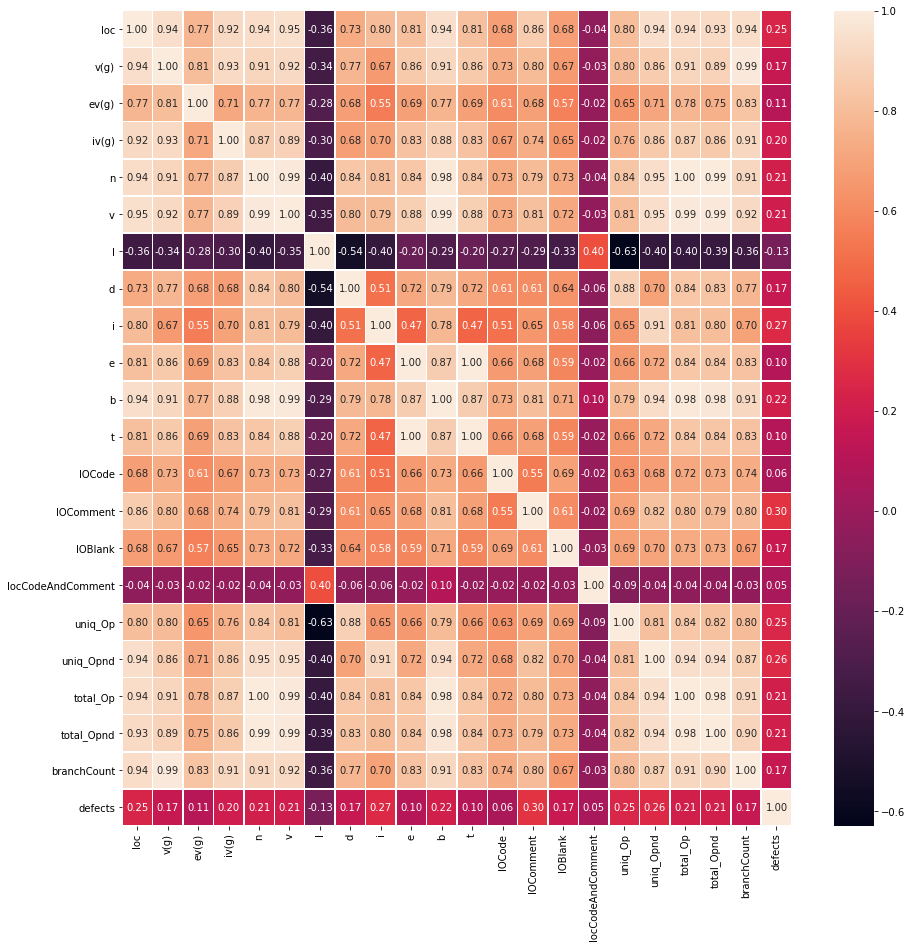

In [18]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [19]:
#split dataset in features and target variable 
feature_cols = ['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
X = data[feature_cols] 
y = data.defects 

In [20]:
# k tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=16)
fit = test.fit(X, y)
fit.scores_

array([1.86153108e+03, 1.78925143e+02, 2.94768979e+01, 1.72692517e+02,
       7.72916437e+03, 6.73872496e+04, 1.51544247e+00, 2.08709347e+02,
       1.26829816e+03, 2.45205523e+06, 2.42024316e+01, 1.36226869e+05,
       3.77086190e+01, 2.45462196e+03, 5.18126969e+02, 1.86659697e+00,
       1.87935332e+02, 1.53747629e+03, 4.69082897e+03, 3.04028431e+03,
       3.47693723e+02])

In [22]:
X_new=test.fit_transform(X, y)

In [24]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1) 

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
#y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.85


In [26]:
#clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
#clf.fit(X_train,y_train)
#y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
#print("Accuracy (Random Forest):",metrics.accuracy_score(y_test, y_pred))

In [27]:
#methods of class sklearn.preprocessing.StandardScaler() 
#Data standardization - rescaling the attributes so that they have mean as 0 and variance as 1.
#goal - bring down all the features to a common scale without distorting the differences in the range of the values.
#In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.
#The fit method calculates the mean and variance of each of the features present in our data. 
#The transform method is transforming all the features using the respective mean and variance.
#Using the transform method we can use the same mean and variance as it is calculated from our training data 
#to transform our test data. 
#Thus, the parameters learned by our model using the training data will help us to transform our test data.
#model is not biased towards a particular feature of the dataset and at the same time prevents 
#our model to learn the features/values/trends of our test data.